In [1]:
#!/usr/bin/env python3
#-*- coding: utf-8 -*-
""" Usage:
      mfcc directory
      Convert all the .wav file under the directory to MFCC (in numpy array format)
"""

' Usage:\n      mfcc directory\n      Convert all the .wav file under the directory to MFCC (in numpy array format)\n'

In [7]:
import librosa, librosa.display
import IPython.display
import matplotlib.pyplot as plt
import numpy as np

def wav2mfcc(fn):
    plt.rcParams['figure.figsize'] = [20, 5]
    y, fs = librosa.load(fn)

    print(y.shape)
    plt.figure()
    plt.subplot(3, 1, 1)
    librosa.display.waveplot(y, sr=fs)
    plt.show()
    
    db=librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    print(db.shape)
    librosa.display.specshow(db, sr=fs, x_axis='time', y_axis='linear') #,cmap='Greys')
    #plt.colorbar(format='%+2.0f dB')
    plt.title('Linear-frequency power spectrogram')
    plt.show()

    n_fft = int(fs * 0.01)   # window length: 0.01 s
    hop_length = n_fft // 2  # usually one specifies the hop length as a fraction of the window length
    mfccs = librosa.feature.mfcc(y, sr=fs, n_mfcc=24, hop_length=hop_length, n_fft=n_fft)

    print(mfccs.shape)
    print(type(mfccs))

    librosa.display.specshow(mfccs, sr=fs, x_axis='time', y_axis='hz', hop_length=hop_length, cmap='Greys')
    plt.show()

    np.save(fn[:-4]+'.mfcc', mfccs, allow_pickle=False)

Input directory:./
.\out001.wav
(1106927,)


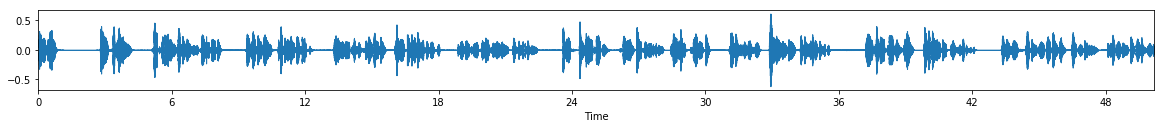

(1025, 2162)


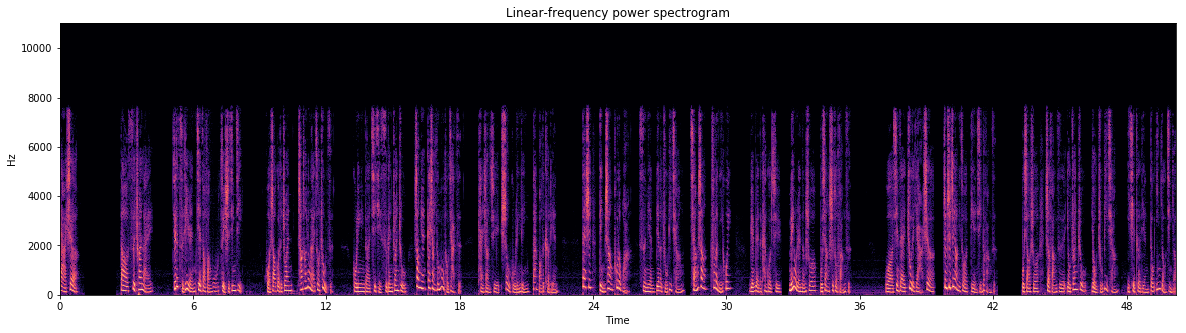

(24, 10063)
<class 'numpy.ndarray'>


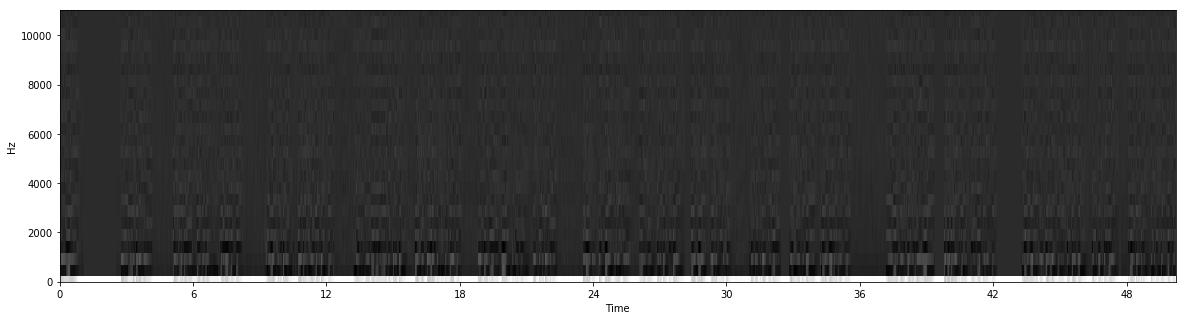

In [8]:
import glob
import os.path
import sys

wavdir=input("Input directory:")
if os.path.isdir(wavdir):
    wavfl = glob.glob(wavdir+'/*.wav')
    for w in wavfl:
        print(w)
        wav2mfcc(w) 
#wav2mfcc('out001.wav')
#if __name__ == '__main__':
#    try:
#        wavdir = args
#        if os.path.isdir(wavdir):

#    except:
#        print(__doc__)
#        sys.exit(0)